<a href="https://colab.research.google.com/github/rajatDpatil/codesoft-ML-internship/blob/main/CodSoft_task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CREDIT CARD FRAUD DETECTION

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kartik2112/fraud-detection")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/kartik2112/fraud-detection/versions/1


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
train_data=pd.read_csv("/content/fraudTrain.csv")
test_data=pd.read_csv("/content/fraudTest (1).csv")

In [ ]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,1/1/2019 0:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",3/9/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,1/1/2019 0:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,6/21/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,1/1/2019 0:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1/19/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,1/1/2019 0:01,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1/12/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,1/1/2019 0:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,3/28/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
test_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,6/21/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,3/19/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,6/21/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1/17/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,6/21/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",10/21/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,6/21/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,7/25/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,6/21/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,7/6/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
df=pd.concat([train_data,test_data])

In [ ]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,1/1/2019 0:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",3/9/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,1/1/2019 0:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,6/21/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,1/1/2019 0:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1/19/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,1/1/2019 0:01,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1/12/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,1/1/2019 0:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,3/28/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1604294 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1604294 non-null  int64  
 1   trans_date_trans_time  1604294 non-null  object 
 2   cc_num                 1604294 non-null  float64
 3   merchant               1604294 non-null  object 
 4   category               1604294 non-null  object 
 5   amt                    1604294 non-null  float64
 6   first                  1604294 non-null  object 
 7   last                   1604294 non-null  object 
 8   gender                 1604294 non-null  object 
 9   street                 1604294 non-null  object 
 10  city                   1604294 non-null  object 
 11  state                  1604294 non-null  object 
 12  zip                    1604294 non-null  int64  
 13  lat                    1604294 non-null  float64
 14  long                   1

In [ ]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


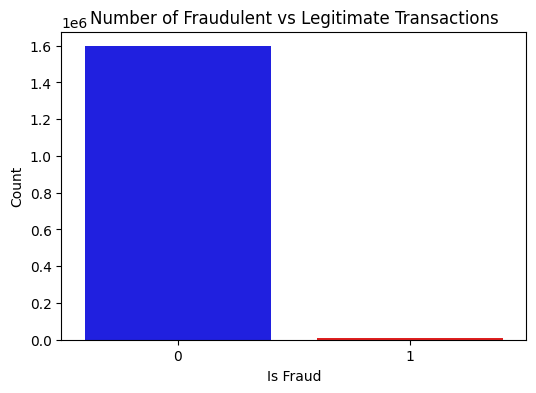

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=df, palette={'0': 'blue', '1': 'red'})
plt.title('Number of Fraudulent vs Legitimate Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

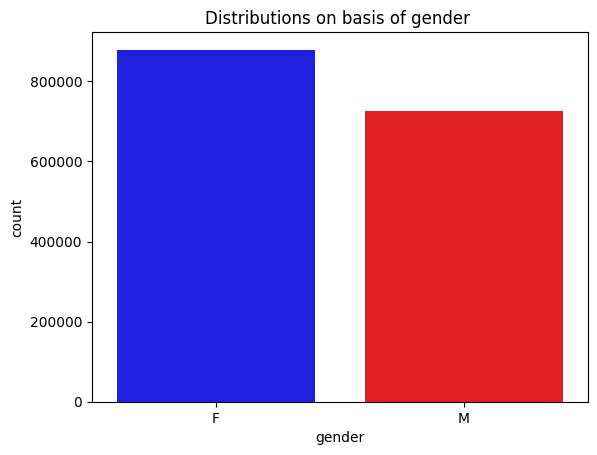

In [ ]:
sns.countplot(x='gender',data=df,palette={'F': 'blue', 'M': 'red'})
plt.title("Distributions on basis of gender ")
plt.xticks
plt.show()

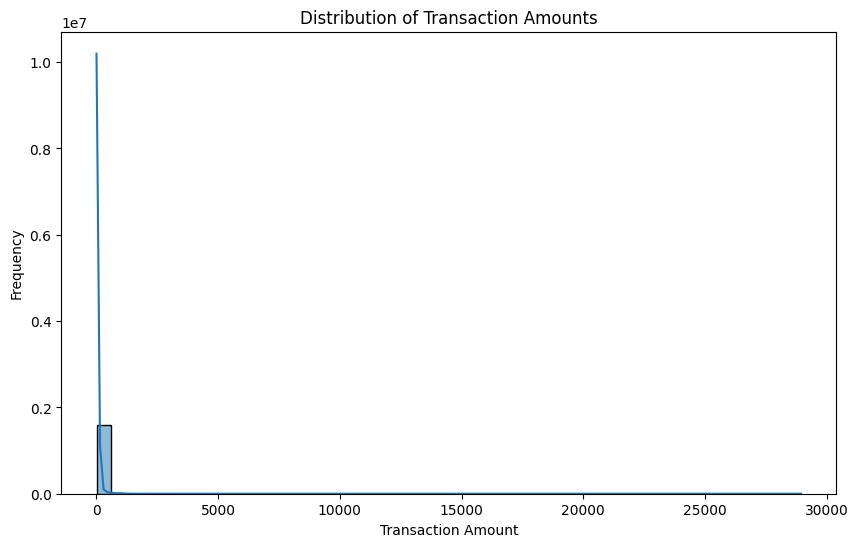

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['amt'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

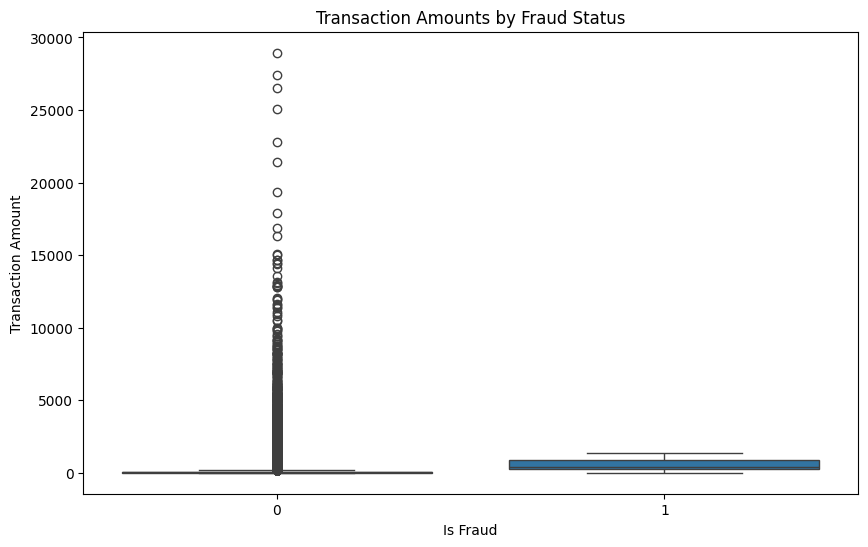

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_fraud', y='amt', data=df)
plt.title('Transaction Amounts by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount')
plt.show()

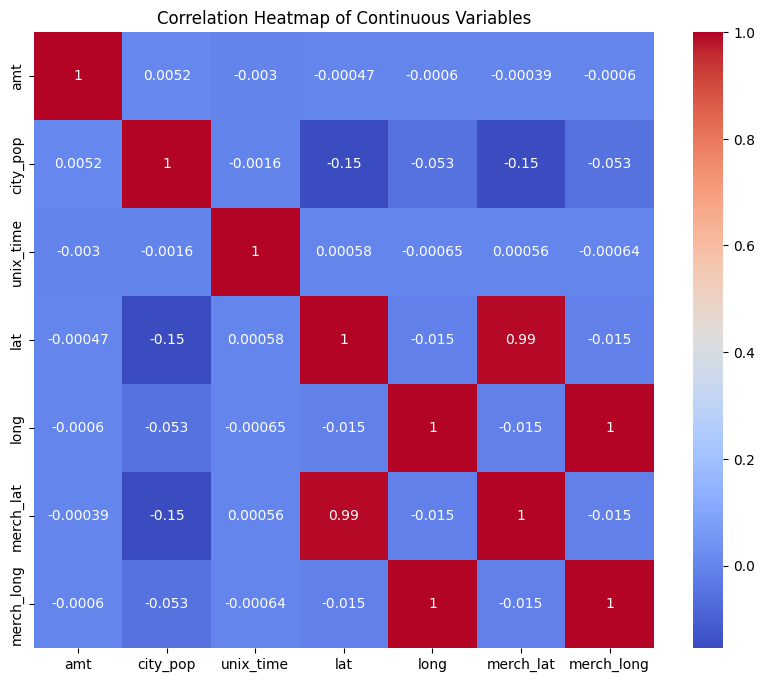

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['amt', 'city_pop', 'unix_time', 'lat', 'long', 'merch_lat', 'merch_long']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Continuous Variables')
plt.show()

In [ ]:
df["merchant"].value_counts().sum()

1604294

In [ ]:
df["gender"].unique()

array(['F', 'M'], dtype=object)

In [ ]:
df["is_fraud"].value_counts()

,count
is_fraud,
0,1596143
1,8151


In [ ]:
df["category"].value_counts()

,count
category,
gas_transport,162800
grocery_pos,152459
home,151923
shopping_pos,144144
kids_pets,140096
shopping_net,120678
entertainment,116085
food_dining,113309
personal_care,112825


In [ ]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
df=df.drop(['Unnamed: 0','trans_date_trans_time','cc_num',"merchant","category","first","last","gender","street","city","state","job","dob","trans_num"],axis=1)

In [ ]:
x=df[['amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat',
       'merch_long']]
y=df['is_fraud']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
#Logistic regg. algorithm
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
lr=LogisticRegression()
lr.fit(x_train,y_train)
ŷ_train=lr.predict(x_train)
ŷ_test=lr.predict(x_test)
print("train_accuracy",accuracy_score(y_train,ŷ_train))
print("test_accuracy",accuracy_score(y_test,ŷ_test))
print("cross_validation",cross_val_score(lr,x_train,y_train,cv=5).mean())

train_accuracy 0.9945022537175626
test_accuracy 0.994414992255165
cross_validation 0.9946658771188256


In [ ]:
#Desision tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion="gini")
dt.fit(x_train,y_train)
ŷ_train=dt.predict(x_train)
ŷ_test=dt.predict(x_test)
print("train_accuracy",accuracy_score(y_train,ŷ_train))
print("test_accuracy",accuracy_score(y_test,ŷ_test))
print("cross_validation",cross_val_score(lr,x_train,y_train,cv=5).mean())

train_accuracy 1.0
test_accuracy 0.9936451837099786
cross_validation 0.9946658771188256


In [ ]:
#Random forest algo.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import time
start_time = time.time()

rf = RandomForestClassifier(
    n_estimators=50,
    max_depth=10,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

rf.fit(x_train, y_train)
ŷ_train = rf.predict(x_train)
ŷ_test = rf.predict(x_test)

print("Training Accuracy:", accuracy_score(y_train, ŷ_train))
print("Test Accuracy:", accuracy_score(y_test, ŷ_test))
cross_val = cross_val_score(rf, x_train, y_train, cv=3, n_jobs=-1)
print("Cross-Validation Score (mean):", cross_val.mean())

Training Accuracy: 0.9955416518951096
Test Accuracy: 0.9953375158558744
Cross-Validation Score (mean): 0.9953172540573031
